# Kernel keeps restarting when I want to run all of the charts in `_report_route_dir_visuals`
* To

In [ ]:
import altair as alt
import calitp_data_analysis.magics
import geopandas as gpd
import google.auth
import pandas as pd
from IPython.display import HTML, Image, Markdown, display, display_html
from omegaconf import OmegaConf
from update_vars import GTFS_DATA_DICT, RT_SCHED_GCS, SCHED_GCS, SEGMENT_GCS

readable_dict = OmegaConf.load("readable2.yml")
credentials, project = google.auth.default()

import _report_route_dir_visuals

In [ ]:
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

In [ ]:
# portfolio_name = "City and County of San Francisco"
portfolio_name = "Ventura County (VCTC, Gold Coast, Cities of Camarillo, Moorpark, Ojai, Simi Valley, Thousand Oaks)"

In [ ]:
ROUTE_DIR_MONTH_FILE = GTFS_DATA_DICT.digest_tables.monthly_route_schedule_vp_report
ROUTE_DIR_QTR_FILE = "digest/quarterly_schedule_vp_metrics_report"

month_df = pd.read_parquet(
    f"{RT_SCHED_GCS}{ROUTE_DIR_MONTH_FILE}.parquet",
    filters=[[("Portfolio Organization Name", "==", portfolio_name)]],
)

qtr_df = pd.read_parquet(
    f"{RT_SCHED_GCS}{ROUTE_DIR_QTR_FILE}.parquet",
    filters=[[("Portfolio Organization Name", "==", portfolio_name)]],
)

In [ ]:
_report_route_dir_visuals.route_filter(qtr_df, month_df)

### `text_charts` are also messed up 
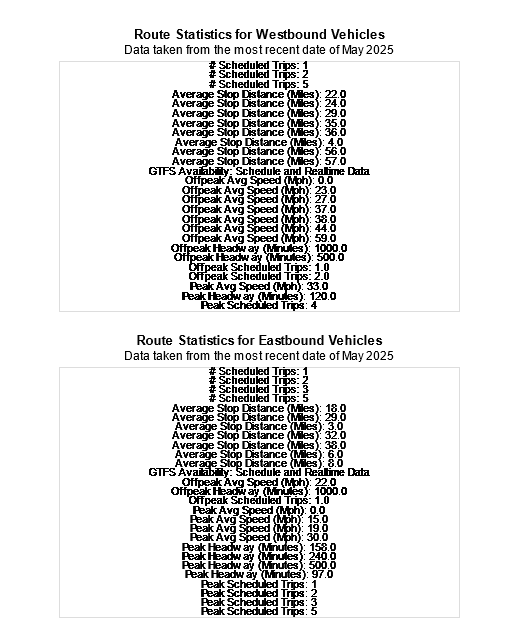

In [ ]:
dir_0 = month_df.loc[month_df["Direction (0/1)"] == 0]

In [ ]:
text_table_dir_0 = _report_route_dir_visuals.reshape_df_text_table(dir_0)

In [ ]:
routes_list = month_df["Route"].unique().tolist()

route_dropdown = alt.binding_select(
    options=routes_list,
    name="Routes: ",
)

# Column that controls the bar charts
xcol_param = alt.selection_point(
    fields=["Route"], value=routes_list[0], bind=route_dropdown
)

In [ ]:
(
    _report_route_dir_visuals.text_chart(month_df, 1)
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
ROUTE_DIR_MONTH_FILE

In [ ]:
month_df = pd.read_parquet(
    f"{RT_SCHED_GCS}{ROUTE_DIR_MONTH_FILE}.parquet",
    filters=[[("Portfolio Organization Name", "==", portfolio_name)]],
)

In [ ]:
portfolio_name

In [ ]:
month_df.columns

In [ ]:
month_80_89_df = month_df.loc[
    (month_df["Route"] == "80-89 Coastal Express")
    & (month_df["Direction"] == "Eastbound")
    & (month_df.Date == "2025-05-14")
]

In [ ]:
month_80_89_df.loc[month_80_89_df.Period == "Peak"][
    ["Portfolio Organization Name", "# Scheduled Trips"]
].drop_duplicates()

In [ ]:
text_table_dir_0.head(2)

In [ ]:
text_table_dir_0_one_route = text_table_dir_0.loc[
    text_table_dir_0.Route == "80-89 Coastal Express"
]

In [ ]:
text_table_dir_0_one_route.shape

In [ ]:
text_table_dir_0_one_route.variable.value_counts()

In [ ]:
text_table_dir_0_one_route

In [ ]:
text_table_dir_0_one_route.Date.unique()

In [ ]:
ROUTE_DIR_MONTH_FILE = (
    GTFS_DATA_DICT.digest_tables.monthly_route_schedule_vp
)  # Report by month
og_month_df = pd.read_parquet(f"{RT_SCHED_GCS}{ROUTE_DIR_MONTH_FILE}.parquet")

In [ ]:
month_80_89_og_df = og_month_df.loc[
    (og_month_df["recent_combined_name"] == "80-89 Coastal Express")
    & (og_month_df["route_primary_direction"] == "Eastbound")
    & (og_month_df.service_date == "2025-05-14")
]

In [ ]:
month_80_89_og_df.route_id.unique()

In [ ]:
month_80_89_og_df.loc[month_80_89_og_df.time_period == "all_day"][
    [
        "route_primary_direction",
        "organization_name",
        "portfolio_organization_name",
        "route_id",
        "recent_combined_name",
        "service_date",
        "avg_stop_miles",
        "n_scheduled_trips",
        "time_period",
    ]
].sort_values(by="service_date")

### `sched_vp_per_min` is broken. It keeps displaying more than one route even when I have selected only one route from the dropdown menu
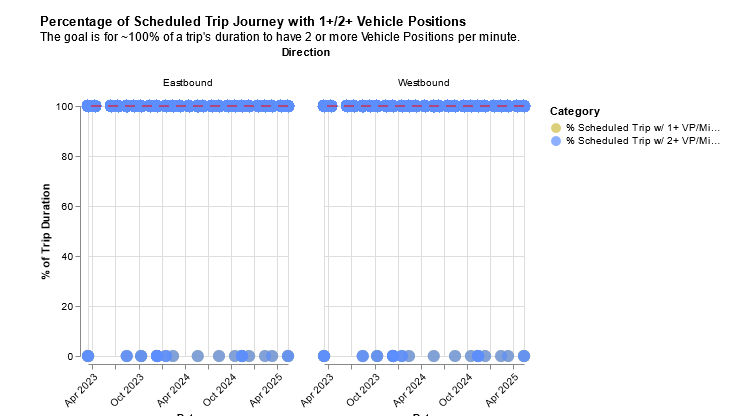

In [ ]:
pct_journey_with_vp_df = _report_route_dir_visuals.reshape_pct_journey_with_vp(month_df)

In [ ]:
pct_journey_with_vp_df.columns

In [ ]:
pct_journey_with_vp_df.Date.unique()

In [ ]:
route_80_89 = pct_journey_with_vp_df.loc[
    (pct_journey_with_vp_df.Route == "80-89 Coastal Express")
    & (pct_journey_with_vp_df.Date == "2025-05-14T00:00:00.000000000")
    & (pct_journey_with_vp_df.Direction == "Westbound")
]

In [ ]:
route_80_89.sort_values(by=["Direction", "Period"])

#### This is only for direction 0 and service date of May 2025.

In [ ]:
month_80_89_df.columns

In [ ]:
month_80_89_df.loc[month_80_89_df.time_period == "all_day"][
    [
        "route_primary_direction",
        "schedule_gtfs_dataset_key",
        "time_period",
        "route_id",
        "recent_route_id",
        "recent_combined_name",
        "service_date",
        "pct_sched_journey_atleast1_vp",
        "pct_sched_journey_atleast2_vp",
        "sched_rt_category",
    ]
].sort_values(by=["route_id", "time_period"]).drop_duplicates()

* May date, Westbound Offpeak for % Scheduled Trip w/ 1+ VP/Minute has two values: 0 and 100. This makes no sense. 

In [ ]:
og_month_df.loc[
    (og_month_df.recent_combined_name == "80-89 Coastal Express")
    & (og_month_df.service_date == "2024-10-16T00:00:00.000000000",)
][
    [
        "service_date",
        "direction_id",
        "time_period",
        "pct_sched_journey_atleast1_vp",
        "pct_sched_journey_atleast2_vp",
    ]
].sort_values(
    by=["service_date", "direction_id"]
)

In [ ]:
route_80_89.loc[route_80_89.Date == "2024-10-16"]

In [ ]:
route_80_89.Date.value_counts()

## The charts won't display -> The cell keeps buffering with the * sign.

In [ ]:
routes_list = month_df["Route"].unique().tolist()

route_dropdown = alt.binding_select(
    options=routes_list,
    name="Routes: ",
)
# Column that controls the bar charts
xcol_param = alt.selection_point(
    fields=["Route"], value=routes_list[0], bind=route_dropdown
)

In [ ]:
len(month_df)

In [ ]:
month_df.Date.unique()

In [ ]:
len(qtr_df)

In [ ]:
# Charts
spatial_accuracy = (
    _report_route_dir_visuals.spatial_accuracy_chart(qtr_df[qtr_df.Period == "All Day"])
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

avg_scheduled_min = (
    _report_route_dir_visuals.avg_scheduled_min_chart(
        qtr_df[qtr_df.Period == "All Day"]
    )
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
vp_per_minute = (
    _report_route_dir_visuals.vp_per_minute_chart(qtr_df[qtr_df.Period == "All Day"])
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)
speed = (
    _report_route_dir_visuals.speed_chart(month_df)
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
sched_vp_per_min = (
    _report_route_dir_visuals.sched_vp_per_min_chart(
        month_df[month_df.Period == "All Day"]
    )
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

text_dir0 = (
    _report_route_dir_visuals.text_chart(month_df, 0)
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
text_dir1 = (
    _report_route_dir_visuals.text_chart(month_df, 1)
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

timeliness_dir0 = (
    _report_route_dir_visuals.timeliness_chart(
        month_df[month_df.Period == "All Day"], 0
    )
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
df2 = _report_route_dir_visuals.reshape_timeliness_trips(month_df)

In [ ]:
len(df2)

In [ ]:
len(df2.drop_duplicates())

In [ ]:
text_dir1

In [ ]:
timeliness_dir0

In [ ]:
timeliness_dir1 = (
    _report_route_dir_visuals.timeliness_chart(
        month_df[month_df.Period == "All Day"], 1
    )
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

n_scheduled_dir0 = (
    _report_route_dir_visuals.total_scheduled_trips_chart(
        month_df[month_df.Period == "All Day"], 0
    )
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
timeliness_dir1

In [ ]:
n_scheduled_dir0

In [ ]:
n_scheduled_dir1 = (
    _report_route_dir_visuals.total_scheduled_trips_chart(
        month_df[month_df.Period == "All Day"], 1
    )
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
n_scheduled_dir1

In [ ]:
n_freq_dir0 = (
    _report_route_dir_visuals.headway_chart(month_df[month_df.Period != "All Day"], 0)
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

n_freq_dir1 = (
    _report_route_dir_visuals.headway_chart(month_df[month_df.Period != "All Day"], 1)
    .add_params(xcol_param)
    .transform_filter(xcol_param)
)

In [ ]:
data_quality = _report_route_dir_visuals.divider_chart(
    month_df, readable_dict.data_quality_graph.title
)
rider_quality = _report_route_dir_visuals.divider_chart(
    month_df, readable_dict.rider_quality_graph.title
)
summary = _report_route_dir_visuals.divider_chart(
    month_df, readable_dict.summary_graph.title
)

In [ ]:
chart_list = [
    summary,
    text_dir0,
    text_dir1,
    rider_quality,
    avg_scheduled_min,
    timeliness_dir0,
    timeliness_dir1,
    n_freq_dir0,
    n_scheduled_dir0,
    n_freq_dir1,
    n_scheduled_dir1,
    speed,
    data_quality,
    spatial_accuracy,
    vp_per_minute,
    sched_vp_per_min,
]
chart = alt.vconcat(*chart_list)

In [ ]:
chart

In [ ]:
month_df.loc[month_df.Route == "80-89 Coastal Express"][
    ["Direction", "Date", "Average VP per Minute"]
].sort_values(by=["Date", "Direction"])

In [ ]:
qtr_df.loc[qtr_df.Route == "80-89 Coastal Express"]

In [ ]:
# chart_summary_list = [summary, text_dir0, text_dir1]

In [ ]:
# summary_chart = alt.vconcat(*chart_summary_list)

In [ ]:
# summary_chart

In [ ]:
data_quality_list = [
    data_quality,
    spatial_accuracy,
    vp_per_minute,
    sched_vp_per_min,
]

In [ ]:
# sched_vp_per_min

In [ ]:
# data_quality_chart = alt.vconcat(*data_quality_list)

In [ ]:
# data_quality_chart

In [ ]:
timeliness_dir1

In [ ]:
rider_quality_list1 = [
    rider_quality,
    avg_scheduled_min,
    timeliness_dir0,
    timeliness_dir1,
]

In [ ]:
rider_quality_chart1 = alt.vconcat(*rider_quality_list1)

In [ ]:
# rider_quality_chart1

### Something is wrong with  # of Scheduled Trips

In [ ]:
route_subset = month_df.loc[
    (month_df.Route == "Route 15") | (month_df.Route == "Route 18")
][["Direction", "Date", "Route", "# Scheduled Trips", "Period"]].drop_duplicates()

In [ ]:
route_subset.head()

In [ ]:
sched_trip_dict = readable_dict.n_scheduled_graph

In [ ]:
base = _report_route_dir_visuals.bar_chart(
    x_col="Date:T",
    y_col="# Scheduled Trips",
    color_col="Period:N",
    color_scheme=[*sched_trip_dict.colors],
    tooltip_cols=[*sched_trip_dict.tooltip],
    date_format="%b %Y",
)

In [ ]:
chart = alt.layer(base, data=route_subset)

In [ ]:
chart.add_params(xcol_param).transform_filter(xcol_param)

In [ ]:
rider_quality_list2 = [
    n_scheduled_dir0,
    n_scheduled_dir1,
    speed,
]

In [ ]:
# rider_quality_chart2 = alt.vconcat(*rider_quality_list2)

In [ ]:
month_df.loc[(month_df.Route == "Route 17")][
    ["Date", "# Scheduled Trips"]
].drop_duplicates()

In [ ]:
rider_quality_chart2

In [ ]:
# chart = (_report_route_dir_visuals.route_filter(route_dir_qtr_df,route_dir_month_df))

## Text charts are causing the kernel to die for some notebooks.

In [ ]:
# _report_route_dir_visuals.route_filter(route_dir_qtr_df, route_dir_month_df)

In [ ]:
route_dir_month_df.shape

In [ ]:
route_dir_month_df = route_dir_month_df.loc[route_dir_month_df["Direction (0/1)"] == 0]

In [ ]:
len(route_dir_month_df)

In [ ]:
route_dir_month_df.head(1)

In [ ]:
route_stats_df = _report_route_dir_visuals.reshape_route_stats(route_dir_month_df)

In [ ]:
len(route_stats_df)

In [ ]:
len(route_stats_df.drop_duplicates())

In [ ]:
route_stats_df = route_stats_df.drop_duplicates()

In [ ]:
# Reshape dataframe before plotting
melt1 = route_stats_df.melt(
    id_vars=[
        "Date",
        "Route",
        "Direction",
        "Direction (0/1)",
    ],
    value_vars=[
        "Average Stop Distance (Miles)",
        "# Scheduled Trips",
        "Gtfs Availability",
        "Peak Avg Speed (Mph)",
        "Peak Scheduled Trips",
        "Peak Headway (Minutes)",
        "Offpeak Avg Speed (Mph)",
        "Offpeak Scheduled Trips",
        "Offpeak Headway (Minutes)",
    ],
)

In [ ]:
route_stats_df["Date"].unique()

In [ ]:
len(melt1)

In [ ]:
text_dir0 = _report_route_dir_visuals.text_chart(route_dir_month_df, 0)

In [ ]:
text_dir0